# standard libs
import os
import sys
import logging

# project lib
PROJECT_SRC_PATH = os.path.join(os.path.abspath(''), '..', 'src')
sys.path.append(PROJECT_SRC_PATH)

import utils
import dataset
import visualizations
from prediction_age import AgePredictor
from preprocessing import *

# external libs
import numpy as np
import pandas as pd

# import seaborn as sns
# import matplotlib.pyplot as plt

# import geopandas as gpd
# from shapely import wkt

# import shap

# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from xgboost import XGBRegressor, XGBClassifier, XGBRFClassifier

In [3]:
logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
%load_ext autoreload
%autoreload 2

## Data

In [5]:
path_data_france = os.path.join('..', 'data', 'france-cities-200.csv')
data_france = pd.read_csv(path_data_france)
data_france_sample = data_france.sample(frac=.1)

In [6]:
path_data_netherlands = os.path.join('..', 'data', 'netherlands-cities-200.csv')
data_netherlands = pd.read_csv(path_data_netherlands)
data_netherlands_sample = data_netherlands.sample(frac=.1)

## Preprocessing

## Experiments

### Regression

2022-01-18 08:45:51,029 | INFO : Dataset length: 86159
2022-01-18 08:45:51,093 | INFO : Test dataset length: 17232
2022-01-18 08:45:51,094 | INFO : Training dataset length: 68927
2022-01-18 08:45:51,095 | INFO : Standard deviation of test set: 80.66722741068052
2022-01-18 08:45:51,170 | INFO : Test dataset length after preprocessing: 14749
2022-01-18 08:45:51,171 | INFO : Training dataset length after preprocessing: 59014
2022-01-18 08:45:51,172 | INFO : Standard deviation of test set after preprocessing: 48.81387686875873


MAE: 28.380244098911366 y
RMSE: 38.681497506033594 y
R2: 0.37201480982499036


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


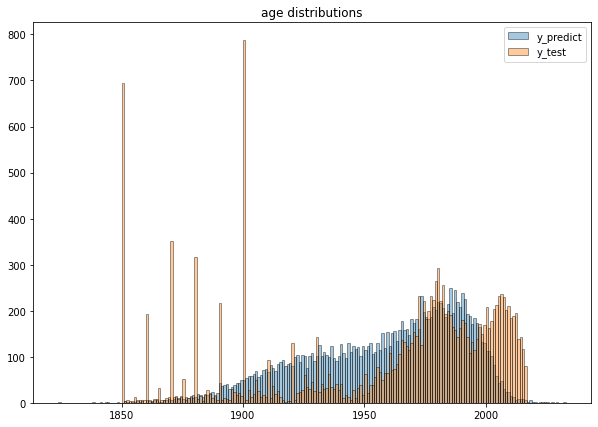

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

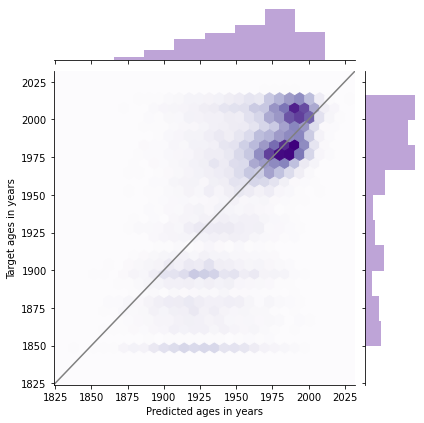

invalid value encountered in true_divide


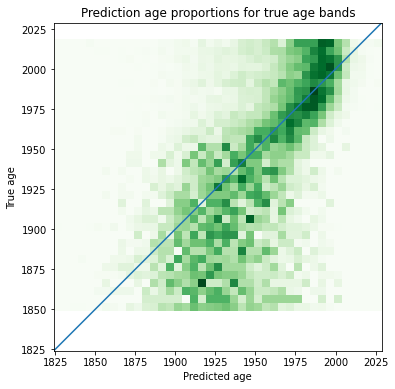

In [10]:
predictor_fr = AgePredictor(
    model=XGBRegressor(),
    df=data_france_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_buildings_pre_1850, add_noise_feature]
)
predictor_fr.evaluate_regression()

2022-01-18 08:46:07,652 | INFO : Dataset length: 147536
2022-01-18 08:46:07,772 | INFO : Test dataset length: 29508
2022-01-18 08:46:07,773 | INFO : Training dataset length: 118028
2022-01-18 08:46:07,774 | INFO : Standard deviation of test set: 32.90961543961814
2022-01-18 08:46:07,917 | INFO : Test dataset length after preprocessing: 29357
2022-01-18 08:46:07,918 | INFO : Training dataset length after preprocessing: 117442
2022-01-18 08:46:07,920 | INFO : Standard deviation of test set after preprocessing: 27.8637746208678


MAE: 14.349742135872619 y
RMSE: 21.054925612370948 y
R2: 0.4289918337624101


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


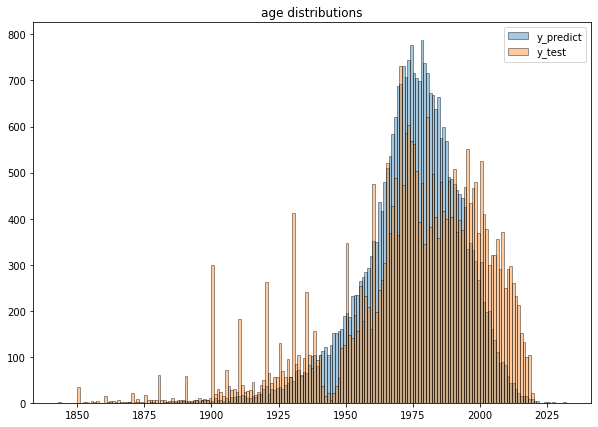

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

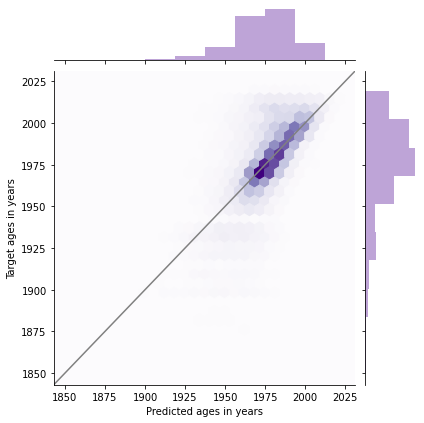

invalid value encountered in true_divide


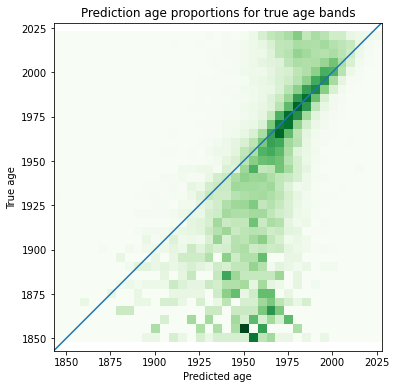

In [11]:
predictor_nl = AgePredictor(
    model=XGBRegressor(),
    df=data_netherlands_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_buildings_pre_1850, add_noise_feature]
)
predictor_nl.evaluate_regression()

2022-01-18 16:59:13,040 | INFO : Dataset length: 233695
2022-01-18 16:59:13,281 | INFO : Test dataset length: 46739
2022-01-18 16:59:13,282 | INFO : Training dataset length: 186956
2022-01-18 16:59:13,283 | INFO : Standard deviation of test set: 58.45568170297842
2022-01-18 16:59:13,691 | INFO : Test dataset length after preprocessing: 44123
2022-01-18 16:59:13,691 | INFO : Training dataset length after preprocessing: 176439
2022-01-18 16:59:13,693 | INFO : Standard deviation of test set after preprocessing: 37.09198971287034


MAE: 19.72670063867537 y
RMSE: 28.597887963936508 y
R2: 0.4055470283218886


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


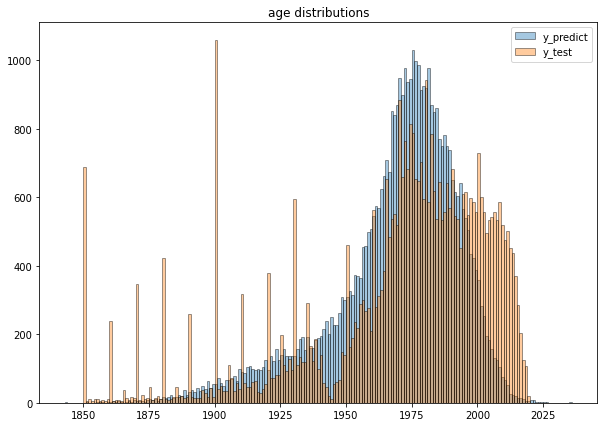

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

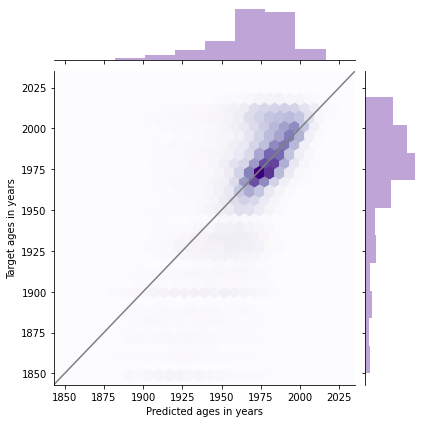

invalid value encountered in true_divide


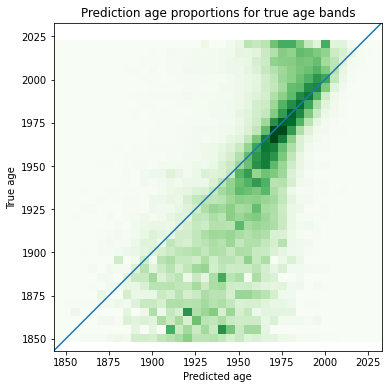

In [50]:
predictor_nl_fr = AgePredictor(
    model=XGBRegressor(),
    df=pd.concat([data_france_sample, data_netherlands_sample], ignore_index=True),
    test_training_split=split_80_20,
    preprocessing_stages=[remove_buildings_pre_1850, add_noise_feature]
)
predictor_nl_fr.evaluate_regression()

### Classification

2022-01-17 22:03:09,613 | INFO : Dataset length: 86179
2022-01-17 22:03:09,694 | INFO : Test dataset length: 17236
2022-01-17 22:03:09,695 | INFO : Training dataset length: 68943
2022-01-17 22:03:09,696 | INFO : Standard deviation of test set: 81.1700225790692
2022-01-17 22:03:09,845 | INFO : Test dataset length after preprocessing: 14782
2022-01-17 22:03:09,846 | INFO : Training dataset length after preprocessing: 58945
2022-01-17 22:03:09,848 | INFO : Standard deviation of test set after preprocessing: 1.8510627512774536


              precision    recall  f1-score   support

           0       0.56      0.79      0.66      3551
           1       0.46      0.21      0.28      1062
           2       0.44      0.25      0.32      1237
           3       0.46      0.42      0.44      2720
           4       0.46      0.50      0.48      3335
           5       0.49      0.43      0.46      2877

    accuracy                           0.50     14782
   macro avg       0.48      0.43      0.44     14782
weighted avg       0.49      0.50      0.48     14782



FixedFormatter should only be used together with FixedLocator
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


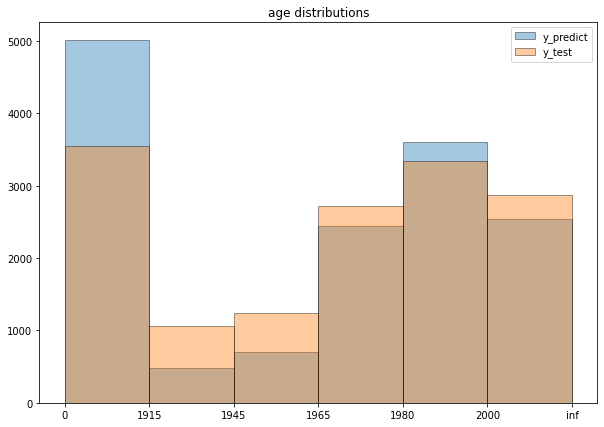

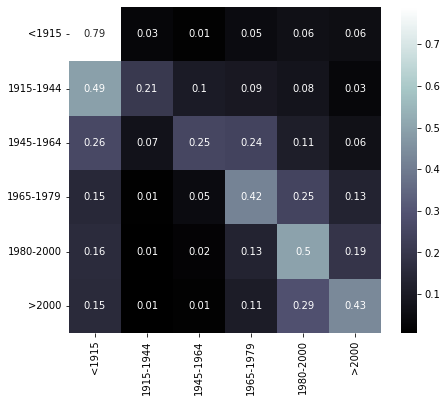

In [11]:
model = XGBClassifier(objective='multi:softmax', num_class=6, use_label_encoder=False, eval_metric=["merror", "mlogloss"])
classifier_fr = AgePredictor(
    model=model,
    df=data_france_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_buildings_pre_1850, categorize_age_EHS]
)
classifier_fr.evaluate_classification()

2022-01-17 21:56:38,043 | INFO : Dataset length: 147536
2022-01-17 21:56:38,182 | INFO : Test dataset length: 29508
2022-01-17 21:56:38,183 | INFO : Training dataset length: 118028
2022-01-17 21:56:38,184 | INFO : Standard deviation of test set: 33.29782222512056
2022-01-17 21:56:38,468 | INFO : Test dataset length after preprocessing: 29335
2022-01-17 21:56:38,469 | INFO : Training dataset length after preprocessing: 117405
2022-01-17 21:56:38,471 | INFO : Standard deviation of test set after preprocessing: 1.3580170979282573


              precision    recall  f1-score   support

           0       0.48      0.38      0.42      1352
           1       0.50      0.55      0.52      2619
           2       0.63      0.61      0.62      4413
           3       0.73      0.71      0.72      7521
           4       0.69      0.77      0.73      8664
           5       0.66      0.58      0.62      4766

    accuracy                           0.66     29335
   macro avg       0.61      0.60      0.60     29335
weighted avg       0.66      0.66      0.66     29335



FixedFormatter should only be used together with FixedLocator
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


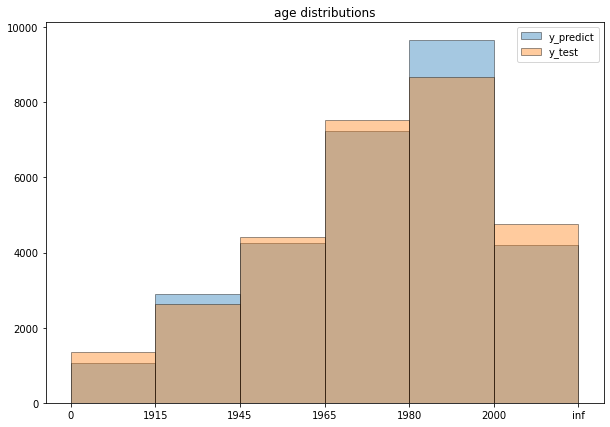

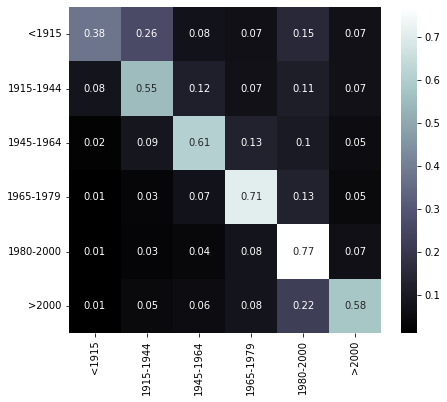

In [9]:
model = XGBClassifier(objective='multi:softmax', num_class=6, use_label_encoder=False, eval_metric=["merror", "mlogloss"])
classifier_nl = AgePredictor(
    model=model,
    df=data_netherlands_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_buildings_pre_1850, categorize_age_EHS]
)
classifier_nl.evaluate_classification()

### Feature importance

83 of 119 features have been excluded:
                                           feature  normalized_importance
81              street_length_av_within_buffer_500               0.006605
108                           n_detached_buildings               0.005964
4                                       Elongation               0.005892
3                                LongestAxisLength               0.005872
83   street_betweeness_global_av_within_buffer_500               0.005805
..                                             ...                    ...
75       street_closeness_500_av_within_buffer_100               0.001614
46          av_block_orientation_within_buffer_100               0.001579
6                                      Orientation               0.001529
105                 total_buildings_footprint_city               0.001194
8                                     CountTouches               0.000283

[83 rows x 2 columns]
                                           feature

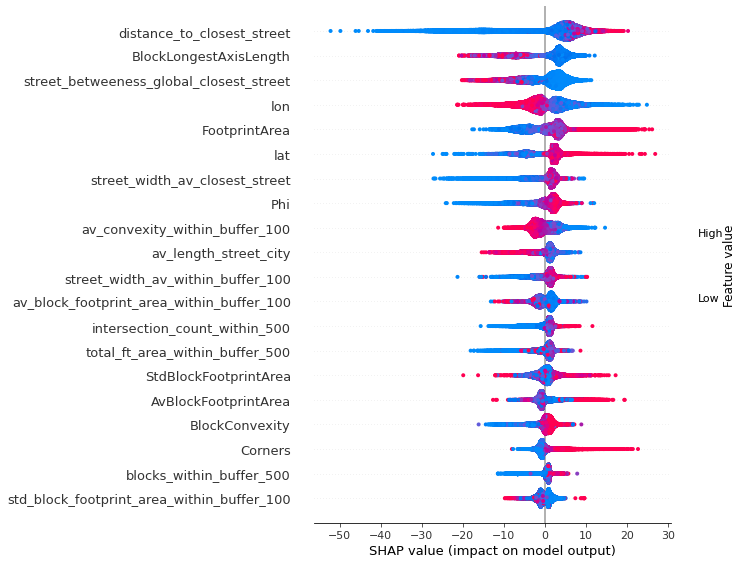

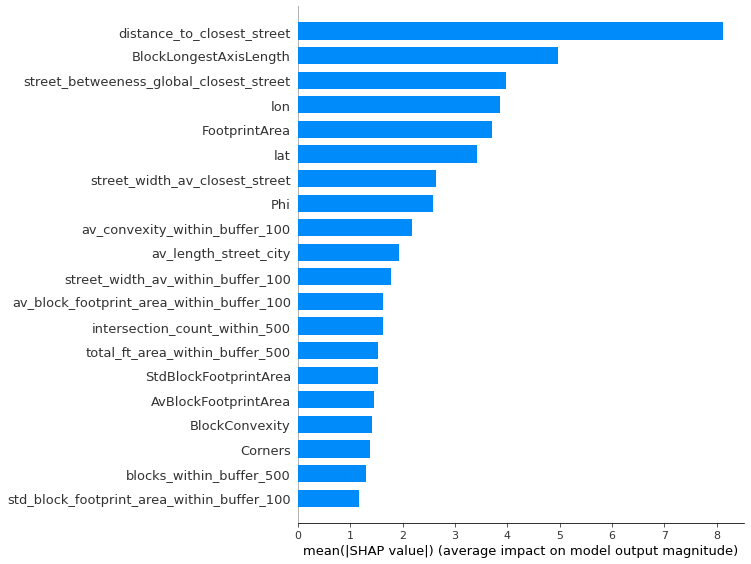

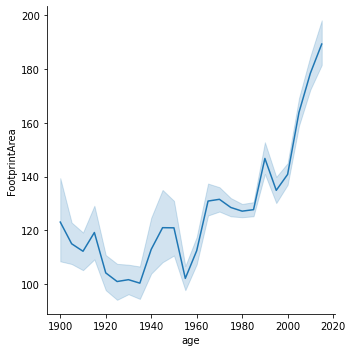

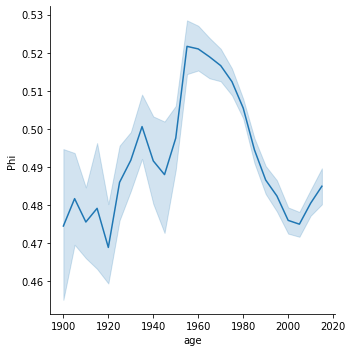

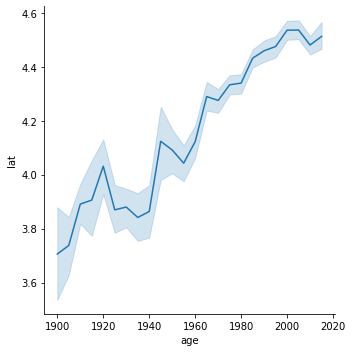

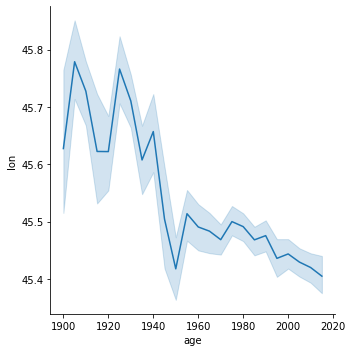

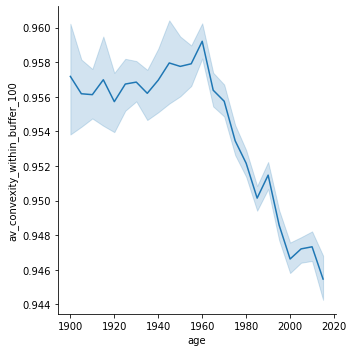

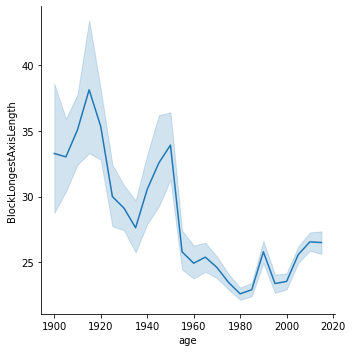

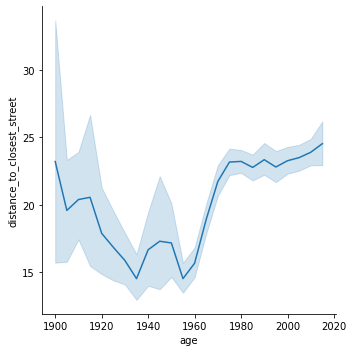

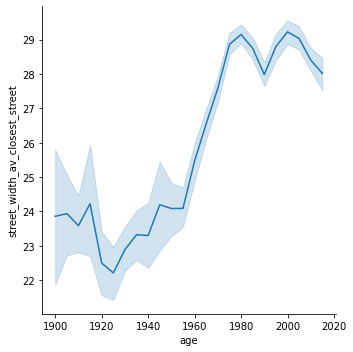

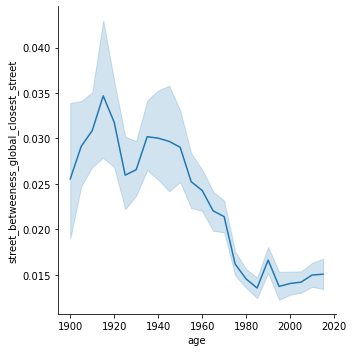

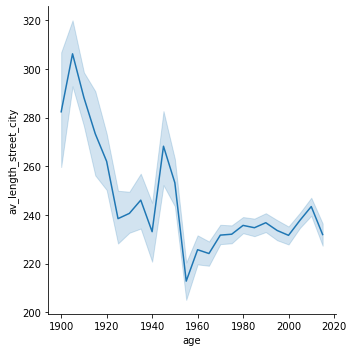

In [15]:
selected_features_fr, excluded_features_fr = predictor_fr.feature_selection()
print(selected_features_fr)
print(predictor_fr.neighborhood_feature_importance())

predictor_fr.SHAP_analysis()
visualizations.plot_feature_over_time(data_france_sample, selected_features_fr[:10]['feature'].values)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


59 of 119 features have been excluded:
                                               feature  normalized_importance
41                                        BlockCorners               0.005547
21                   std_orientation_within_buffer_100               0.005469
28                std_footprint_area_within_buffer_500               0.005316
83       street_betweeness_global_av_within_buffer_500               0.005115
80               street_length_total_within_buffer_500               0.005041
82                   street_width_av_within_buffer_500               0.005025
115                              av_length_street_city               0.004962
72                  street_length_av_within_buffer_100               0.004948
31                   std_orientation_within_buffer_500               0.004880
101       street_based_block_std_area_inter_buffer_500               0.004872
100         street_based_block_av_phi_inter_buffer_500               0.004763
62                       

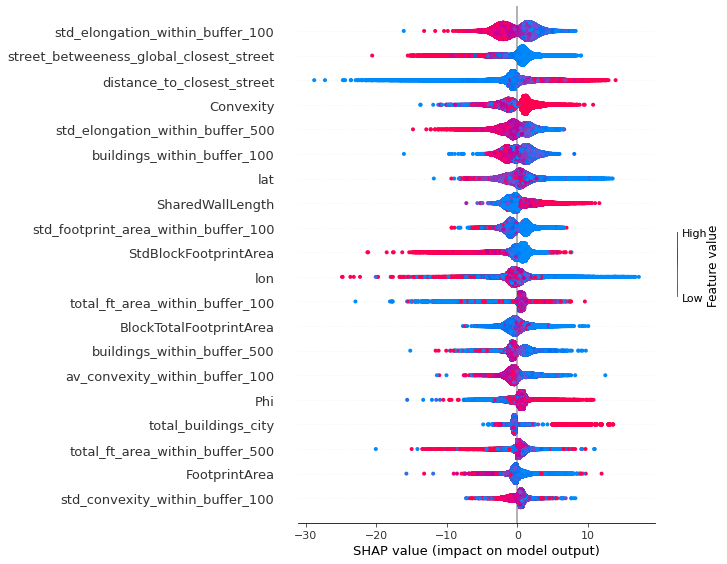

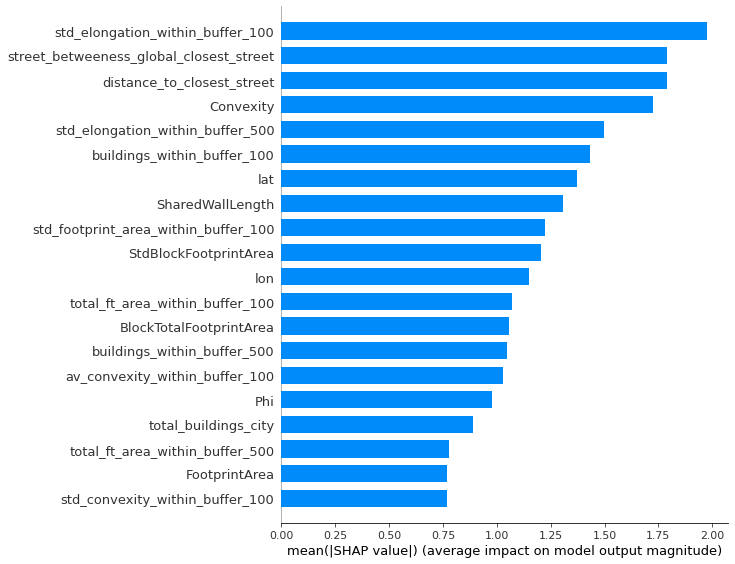

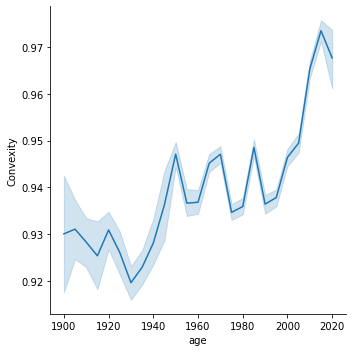

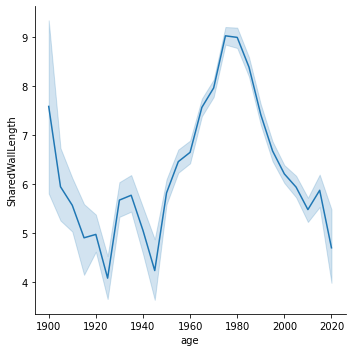

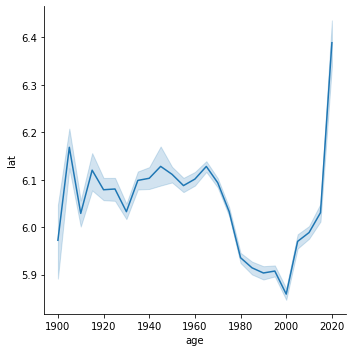

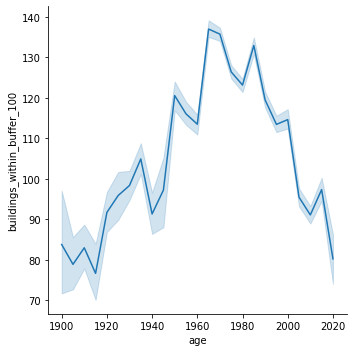

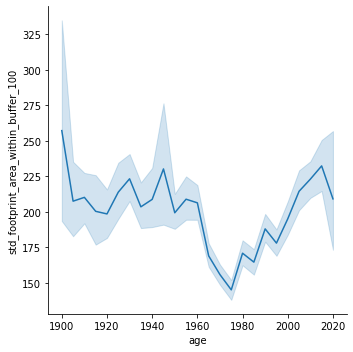

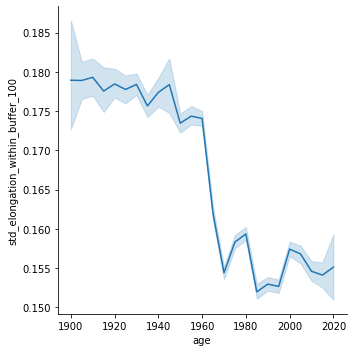

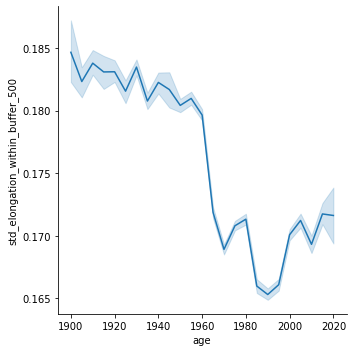

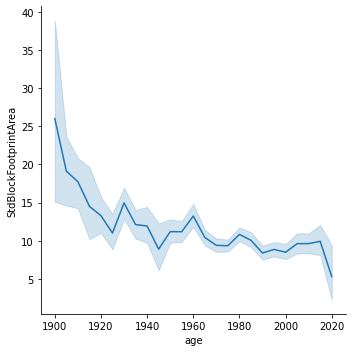

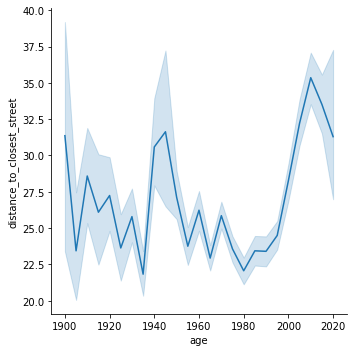

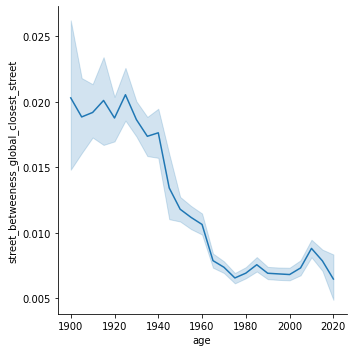

In [16]:
selected_features_nl, excluded_features_nl = predictor_nl.feature_selection()
print(selected_features_nl)
print(predictor_nl.neighborhood_feature_importance())

predictor_nl.SHAP_analysis()
visualizations.plot_feature_over_time(data_netherlands_sample, selected_features_nl[:10]['feature'].values)

In [40]:
list(set(selected_features_nl['feature']).intersection(selected_features_fr['feature']))


['total_ft_area_within_buffer_100',
 'street_closeness_global_closest_street',
 'StdBlockFootprintArea',
 'street_width_av_closest_street',
 'std_convexity_within_buffer_100',
 'av_convexity_within_buffer_100',
 'lon',
 'Phi',
 'street_betweeness_global_closest_street',
 'Convexity',
 'BlockLongestAxisLength',
 'street_width_std_within_buffer_500',
 'street_width_std_closest_street',
 'std_block_av_footprint_area_within_buffer_100',
 'distance_to_closest_street',
 'total_ft_area_within_buffer_500',
 'AvBlockFootprintArea',
 'lat',
 'BlockElongation',
 'BlockTotalFootprintArea',
 'street_betweeness_global_av_within_buffer_100',
 'Corners',
 'FootprintArea',
 'std_block_footprint_area_within_buffer_100',
 'buildings_within_buffer_100',
 'buildings_within_buffer_500',
 'av_footprint_area_within_buffer_100',
 'av_elongation_within_buffer_100']

### Prediction with subset of features

2022-01-18 09:23:09,140 | INFO : Dataset length: 86159
2022-01-18 09:23:09,210 | INFO : Test dataset length: 17232
2022-01-18 09:23:09,211 | INFO : Training dataset length: 68927
2022-01-18 09:23:09,212 | INFO : Standard deviation of test set: 80.66722741068052
2022-01-18 09:23:09,317 | INFO : Test dataset length after preprocessing: 14749
2022-01-18 09:23:09,318 | INFO : Training dataset length after preprocessing: 59014
2022-01-18 09:23:09,319 | INFO : Standard deviation of test set after preprocessing: 48.81387686875873


MAE: 28.469285788443283 y
RMSE: 38.672709506676036 y
R2: 0.3723001196969775


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


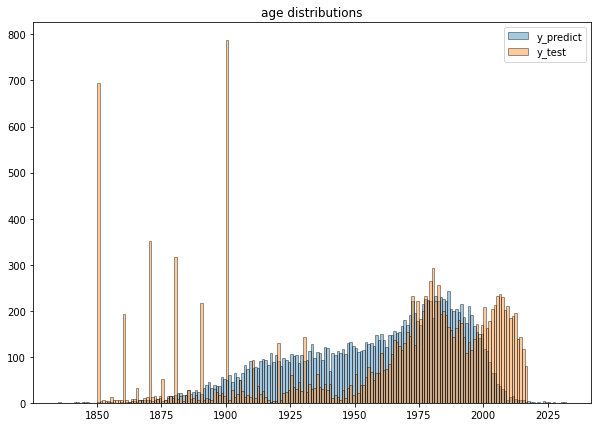

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

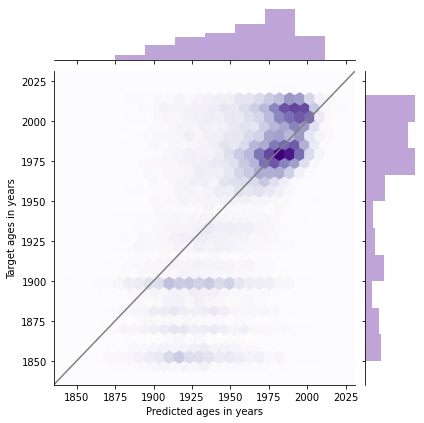

invalid value encountered in true_divide


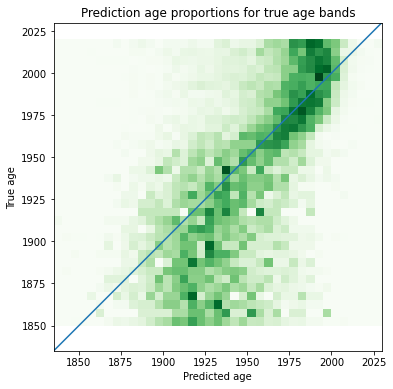

In [26]:
predictor_fr_feature_seclection = AgePredictor(
    model=XGBRegressor(),
    df=data_france_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_buildings_pre_1850, drop_unimportant_features, add_noise_feature]
)
predictor_fr_feature_seclection.evaluate_regression()

2022-01-18 09:24:19,248 | INFO : Dataset length: 147536
2022-01-18 09:24:19,373 | INFO : Test dataset length: 29508
2022-01-18 09:24:19,374 | INFO : Training dataset length: 118028
2022-01-18 09:24:19,375 | INFO : Standard deviation of test set: 32.90961543961814
2022-01-18 09:24:19,533 | INFO : Test dataset length after preprocessing: 29357
2022-01-18 09:24:19,534 | INFO : Training dataset length after preprocessing: 117442
2022-01-18 09:24:19,535 | INFO : Standard deviation of test set after preprocessing: 27.8637746208678


MAE: 14.833175002714428 y
RMSE: 21.365302101423694 y
R2: 0.41203297168474085


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


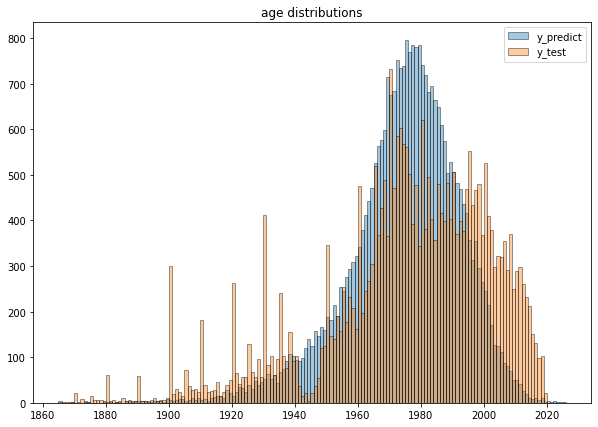

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

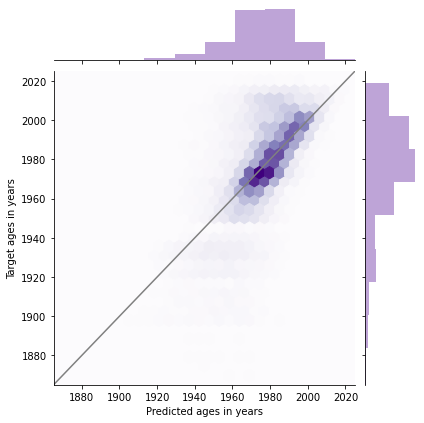

invalid value encountered in true_divide


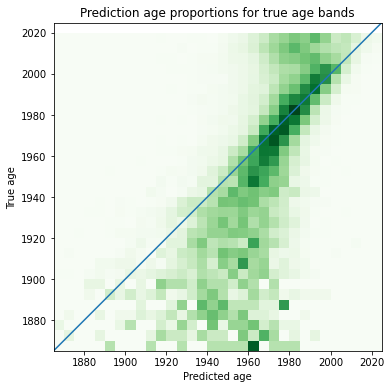

In [27]:
predictor_nl_feature_seclection = AgePredictor(
    model=XGBRegressor(),
    df=data_netherlands_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_buildings_pre_1850, drop_unimportant_features, add_noise_feature]
)
predictor_nl_feature_seclection.evaluate_regression()

### Top 10 features only

In [31]:
selected_features_nl['feature'][:10].values

array(['std_elongation_within_buffer_100',
       'street_betweeness_global_closest_street',
       'distance_to_closest_street', 'Convexity',
       'std_elongation_within_buffer_500', 'buildings_within_buffer_100',
       'lat', 'SharedWallLength', 'std_footprint_area_within_buffer_100',
       'StdBlockFootprintArea'], dtype=object)

2022-01-18 09:32:14,142 | INFO : Dataset length: 147536
2022-01-18 09:32:14,259 | INFO : Test dataset length: 29508
2022-01-18 09:32:14,260 | INFO : Training dataset length: 118028
2022-01-18 09:32:14,261 | INFO : Standard deviation of test set: 32.90961543961814
2022-01-18 09:32:14,427 | INFO : Test dataset length after preprocessing: 29357
2022-01-18 09:32:14,427 | INFO : Training dataset length after preprocessing: 117442
2022-01-18 09:32:14,428 | INFO : Standard deviation of test set after preprocessing: 27.8637746208678


MAE: 16.43778894866695 y
RMSE: 23.001382048657973 y
R2: 0.31853624852142903


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


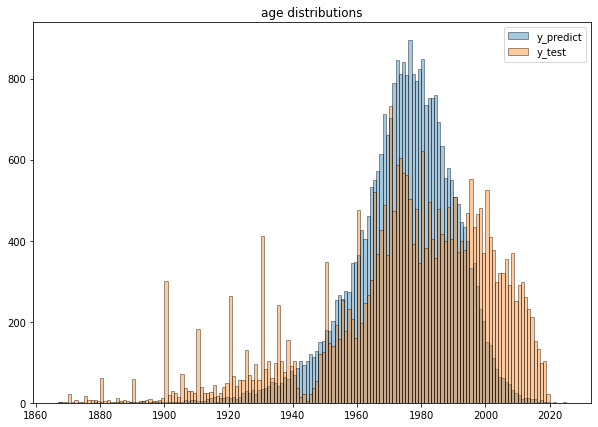

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

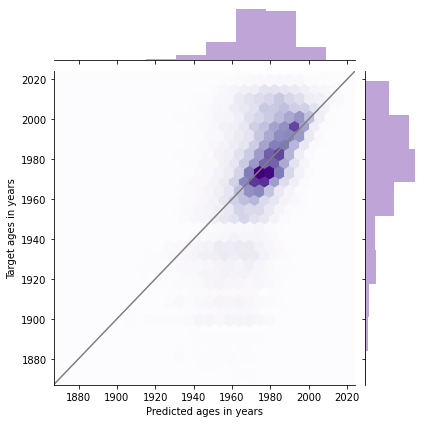

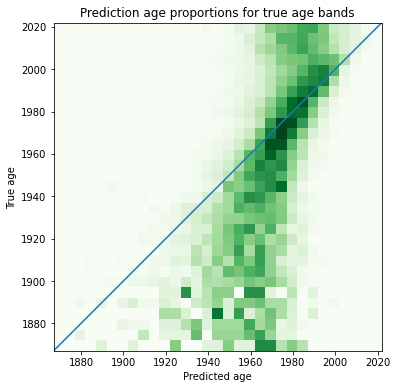

In [35]:
predictor_nl_feature_seclection_10 = AgePredictor(
    model=XGBRegressor(),
    df=data_netherlands_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_buildings_pre_1850, drop_unimportant_features, add_noise_feature]
)
predictor_nl_feature_seclection_10.evaluate_regression()